In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
from exp.nb_07a import *

# Image ItemList

## Get images

In [3]:
URLs.IMAGENETTE_160

'https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-160.tgz'

In [4]:
path = untar_data(URLs.IMAGENETTE_160)
path

Path('/home/sandmann/.fastai/data/imagenette2-160')

In [6]:
#export
import PIL, os, mimetypes
Path.ls = lambda x: list(x.iterdir())

In [7]:
path.ls()

[Path('/home/sandmann/.fastai/data/imagenette2-160/noisy_imagenette.csv'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/.DS_Store'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/train')]

In [8]:
(path/'val').ls()

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03000684'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03394916'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n02979186'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03417042'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03028079'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n02102040'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03425413'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03445777')]

In [9]:
path_tench = (path/'val'/'n01440764')

In [10]:
img_fn = path_tench.ls()[0]
img_fn

Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_17050.JPEG')

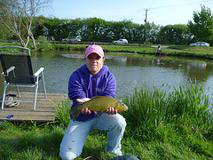

In [11]:
img = PIL.Image.open(img_fn)
img

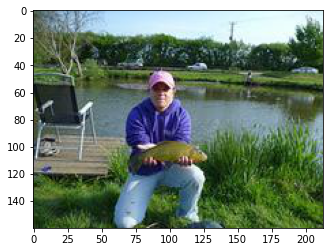

In [12]:
plt.imshow(img);

In [13]:
import numpy
imga = numpy.array(img)

In [14]:
imga.shape

(160, 213, 3)

In [15]:
imga[:5,:5,0]

array([[98, 93, 68, 79, 86],
       [86, 94, 81, 88, 82],
       [71, 80, 80, 88, 84],
       [62, 61, 64, 77, 86],
       [66, 58, 63, 70, 79]], dtype=uint8)

In [16]:
# mimetypes.types_map.items()

In [17]:
#export
image_extensions = set(k for k,v in mimetypes.types_map.items() if v.startswith('image/'))

In [18]:
' '.join(image_extensions)

'.ppm .djvu .svg .cdr .xpm .ico .jpx .psd .pbm .pnm .png .xwd .pcx .crw .pgm .jpm .ief .art .cdt .jpe .nef .pat .jng .bmp .wbmp .jpf .rgb .jpg2 .xbm .erf .jp2 .ras .tiff .orf .cpt .jpeg .djv .gif .cr2 .tif .svgz .jpg'

In [19]:
#export
def setify(o): return o if isinstance(o, set) else set(listify(o))

In [20]:
test_eq(setify('aa'), {'aa'})
test_eq(setify(['aa',1]), {'aa',1})
test_eq(setify(None), set())
test_eq(setify(1), {1})
test_eq(setify({1}), {1})

In [21]:
#export
def _get_files(path, files, extensions=None):
    p = Path(path)
    res = [p/f for f in files if not f.startswith('.') and ((not extensions) or f'.{f.split(".")[-1].lower()}' in extensions)]
    return res

In [22]:
t = [o.name for o in os.scandir(path_tench)]
t[:3]

['n01440764_17050.JPEG', 'n01440764_8030.JPEG', 'n01440764_12131.JPEG']

In [32]:
type(t[0])

str

In [23]:
t_path = _get_files(path_tench, t, image_extensions)
t_path[:3]

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_17050.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_8030.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_12131.JPEG')]

In [35]:
next(os.scandir(path_tench)).name

'n01440764_17050.JPEG'

In [85]:
#export
def get_files(path, extensions=None, recurse=False, include=None):
    path = Path(path)
    extensions = setify(extensions)
    extensions = {e.lower() for e in extensions}
    if recurse:
        res = []
        for i, (p,d,f) in enumerate(os.walk(path)): # returns (dirpath, dirnames, filesnames)
            if include is not None and i == 0: #
                d[:] = [o for o in d if o in include] #
            else: #
                 d[:] = [o for o in d if not o.startswith('.')] # the if else statement changes which directories are looked into; now only the hidden directories are skipped
            res += _get_files(p, f, extensions)
        return res
        
    else:
        f = [o.name for o in os.scandir(path) if o.is_file()]
        return _get_files(path, f, extensions)

In [40]:
get_files(path_tench, image_extensions)[:3]

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_17050.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_8030.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n01440764/n01440764_12131.JPEG')]

In [41]:
get_files(path, image_extensions, recurse=True)[:3]

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_24470.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_6912.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_23801.JPEG')]

In [42]:
get_files(path, image_extensions, recurse=True)[:3]

[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_24470.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_6912.JPEG'),
 Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_23801.JPEG')]

In [43]:
all_fns = get_files(path, image_extensions, recurse=True)
len(all_fns)

13394

In [44]:
%timeit -n 10 get_files(path, image_extensions, recurse=True)

48.6 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Prepare for modeling

## Get files

In [192]:
#export
def compose(x, funcs, *args, order_key='_order', **kwargs):
    key = lambda o: getattr(o, order_key, 0)
    for f in sorted(listify(funcs), key=key): x = f(x, **kwargs)
    return x

In [193]:
ListContainer??

Init signature: ListContainer(items)
Docstring:      <no docstring>
Source:        
class ListContainer():
    def __init__(self, items): self.items = listify(items)
    def __getitem__(self, idx):
        if isinstance(idx, (int, slice)): return self.items[idx]
        if isinstance(idx[0], bool):
            assert len(idx) == len(self)
            return [o for m,o in zip(idx, self.items) if m]
        return [self.items[i] for i in idx]
    def __len__(self): return len(self.items)
    def __iter__(self): return iter(self.items)
    def __setitem__(self, i, o): self.items[i] = 0
    def __delitem__(self, i): del(self.items[i])
    def __repr__(self):
        res = f"{self.__class__.__name__} ({len(self)} items)\n{self.items[:10]}"
        if len(self) > 10: res = res[:-1] + "...]"
        return res
File:           ~/repo/fastai-course-v3/nbs/dl2/selfmade/exp/nb_06.py
Type:           type
Subclasses:     Hooks, ItemList, ItemList, ItemList, ItemList, ItemList, ItemList, ItemList, I

In [194]:
#export
class ItemList(ListContainer):
    def __init__(self, items, path='.', tfms=None):
        super().__init__(items)
        self.path, self.tfms = Path(path), tfms
        
    def __repr__(self): return f'{super().__repr__()}\nPath: {self.path}'
    
    def new(self, items, cls=None):
        if cls is None: cls = self.__class__
        return cls(items, self.path, self.tfms)
    
    def get(self, i): return i
    def _get(self, i): return compose(self.get(i), self.tfms)
        
    def __getitem__(self, idx):
        res = super().__getitem__(idx)
        if isinstance(res, list): return [self._get(o) for o in res]
        return self._get(res)
    
class ImageList(ItemList):
    @classmethod
    def from_files(cls,  path, extensions=None, recurse=True, include=None, **kwargs):
        if extensions is None: extensions = image_extensions
        return cls(get_files(path, extensions, recurse, include), path, **kwargs)
    
    def get(self, fn): return PIL.Image.open(fn)

In [195]:
#export
class Transform(): _order = 0
    
class MakeRGB(Transform):
    def __call__(self, item): return item.convert('RGB')
    
def make_rgb(item): return item.convert('RGB')

In [196]:
il = ImageList.from_files(path, tfms=make_rgb)

In [197]:
il

ImageList (13394 items)
[Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_24470.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_6912.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_23801.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_50102.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_19471.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_7960.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_21912.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_9640.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_880.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_37270.JPEG')...]
Path: /home/sandmann/.fastai/data/imagenette2-160

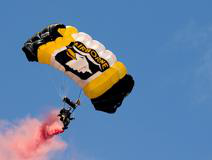

In [198]:
img = il[0]; img

In [199]:
il[:1]

[<PIL.Image.Image image mode=RGB size=212x160 at 0x7F85E7E42D00>]

## Split Validation set

In [200]:
fn = il.items[0]; fn

Path('/home/sandmann/.fastai/data/imagenette2-160/val/n03888257/n03888257_24470.JPEG')

In [204]:
fn.parent.parent.name

'val'

In [207]:
#export
def grandparent_splitter(fn, train_name='train', valid_name='valid'):
    gp = fn.parent.parent.name
    return True if gp == valid_name else False if gp == train_name else None

In [208]:
#export
def split_by_func(items, f):
    mask = [f(o) for o in items]
    # 'None' values will be filtered out
    t = [o for o,m in zip(items, mask) if m == False] # items in training folder
    v = [o for o,m in zip(items, mask) if m == True] # items in val folder
    return t,v

In [209]:
splitter = partial(grandparent_splitter, valid_name='val')

In [210]:
%time train, valid = split_by_func(il, splitter)

CPU times: user 29.7 ms, sys: 0 ns, total: 29.7 ms
Wall time: 28.9 ms


In [212]:
len(train), len(valid)

(9469, 3925)

In [236]:
#export
class SplitData():
    def __init__(self, train, valid): self.train, self.valid = train, valid
        
    def __getattr__(self, k): return getattr(self.train, k)
    # This is needed if we want to picle SplitData and be able to load it back without recursion erros
    def __setstate__(self, data:Any): self.__dict__.update(data)
        
    @classmethod
    def split_by_func(cls, il, f):
#         lists = map(il.new, split_by_func(il.items, f))
        lists = map(il.new, split_by_func(il, f))
        return cls(*lists)
    
    def __repr__(self): return f'{self.__class__.__name__}\nTrain: {self.train}\nValid: {self.valid}\n'

In [237]:
sd = SplitData.split_by_func(il, splitter); sd

SplitData
Train: ImageList (9469 items)
[Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_94.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_11699.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_12593.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_30279.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_18664.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_33624.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_20118.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_10703.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_29778.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_30018.JPEG')...]
Path: /home/sandmann/.fastai/data/imagenette2-160
Valid: Im

In [245]:
sd.train

ImageList (9469 items)
[Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_94.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_11699.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_12593.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_30279.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_18664.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_33624.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_20118.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_10703.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_29778.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_30018.JPEG')...]
Path: /home/sandmann/.fastai/data/imagenette2-160

## Labeling

In [238]:
#export
from collections import OrderedDict

def uniqueify(x, sort=False):
    res = list(OrderedDict.fromkeys(x).keys())
    if sort: res.sort()
    return res

In [239]:
#export
class Processor():
    def process(self, items): return items
    
class CategoryProcessor(Processor):
    def __init__(self): self.vocab = None
        
    def __call__(self, items):
        # The vocab is defined on the first use
        if self.vocab is None:
            self.vocab = uniqueify(items)
            self.otoi = {v:k for k,v in enumerate(self.vocab)}
        return [self.proc1(o) for o in items]
    
    def proc1(self, item): return self.otoi[item]
    
    def deprocess(self, idxs):
        assert self.vocab is not None
        return [self.deproc1(idx) for idx in idxs]
    
    def deproc1(self, idx): return self.vocab[idx]

In [250]:
#export
def parent_labeler(fn): return fn.parent.name

def _label_by_func(il, f, cls=ItemList): return cls([f(o) for o in il.items], path=il.path)

In [266]:
#export 
class LabeledData():
    def process(self, il, proc): return il.new(compose(il, proc)) # maybe il.items needed?
    
    def __init__(self, x, y, proc_x=None, proc_y=None):
        self.x, self.y = self.process(x, proc_x), self.process(y, proc_y)
        self.proc_x, self.proc_y = proc_x, proc_y
        
    def __repr__(self): return f'{self.__class__.__name__}\nx: {self.x}\ny: {self.y}\n'
    
    def __getitem__(self, idx): return self.x[idx], self.y[idx]
    def __len__(self): return len(self.x)
    
    def x_obj(self, idx): return self.obj(self.x, idx, self.proc_x)
    def y_obj(self, idx): return self.obj(self.y, idx, self.proc_y)
    
    def obj(self, items, idx, procs):
        isint = isinstance(idx,  int) or (isinstance(idx, torch.LongTensor) and not idx.ndim)
        item = items[idx]
        for proc in reversed(listify(procs)):
            item = proc.deproc1(item) if isint else proc.deprocess(item)
        return item
    
    @classmethod
    def label_by_func(cls, il, f, proc_x=None, proc_y=None):
        return cls(il, _label_by_func(il, f), proc_x=proc_x, proc_y=proc_y)

In [267]:
#export
def label_by_func(sd, f, proc_x=None, proc_y=None):
    train = LabeledData.label_by_func(sd.train, f, proc_x=proc_x, proc_y=proc_y)
    valid = LabeledData.label_by_func(sd.valid, f, proc_x=proc_x, proc_y=proc_y)
    return SplitData(train, valid)

In [268]:
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

In [269]:
assert ll.train.proc_y is ll.valid.proc_y

In [270]:
ll.train.y

ItemList (9469 items)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0...]
Path: /home/sandmann/.fastai/data/imagenette2-160

In [271]:
ll.train.y.items[0]

0

In [272]:
ll.train.y_obj(0)

'n03888257'

In [273]:
ll.train.y_obj(slice(2))

['n03888257', 'n03888257']

In [275]:
ll

SplitData
Train: LabeledData
x: ImageList (9469 items)
[Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_94.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_11699.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_12593.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_30279.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_18664.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_33624.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_20118.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_10703.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_29778.JPEG'), Path('/home/sandmann/.fastai/data/imagenette2-160/train/n03888257/n03888257_30018.JPEG')...]
Path: /home/sandmann/.fastai/data/imagenette

## Transform to tensor

In [276]:
ll.train[0]

(<PIL.Image.Image image mode=RGB size=160x219 at 0x7F85E54283D0>, 0)

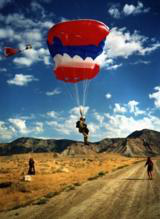

In [277]:
ll.train[0][0]

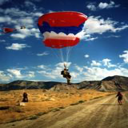

In [278]:
ll.train[0][0].resize((128,128))

In [327]:
#export
class ResizeFixed(Transform):
    _order = 10
    def __init__(self, size):
        if isinstance(size, int): size = (size,size)
        self.size = size
        
    def __call__(self, item): return item.resize(self.size, PIL.Image.BILINEAR)
    
def to_byte_tensor(item):
    res = torch.ByteTensor(torch.ByteStorage.from_buffer(item.tobytes()))
    w, h = item.size
    return res.view(h,w,-1).permute(2,0,1)
#     return res.view(h, w, -1)
to_byte_tensor._order = 20

def to_float_tensor(item): return item.float().div_(255.)
to_float_tensor._order = 30

In [328]:
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, splitter)
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())

In [329]:
#export
def show_image(im, figsize=(3,3)):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(im.permute(1,2,0))
#     plt.imshow(im)

In [330]:
x, y = ll.train[0]
x.shape

torch.Size([3, 128, 128])

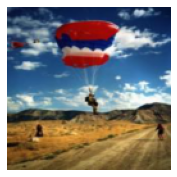

In [331]:
show_image(x)

# Modeling

## DataBunch

In [332]:
bs = 64

In [333]:
train_dl, valid_dl = get_dls(ll.train, ll.valid, bs, num_workers=4)

In [334]:
x, y = next(iter(train_dl))

In [335]:
x.shape

torch.Size([64, 3, 128, 128])

'n02102040'

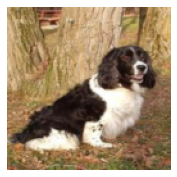

In [341]:
show_image(x[0])
ll.train.proc_y.vocab[y[0]]

In [342]:
y

tensor([6, 0, 1, 0, 6, 3, 7, 6, 5, 0, 3, 5, 9, 9, 1, 5, 7, 2, 6, 8, 4, 7, 6, 8,
        7, 1, 3, 9, 7, 9, 4, 8, 6, 5, 4, 5, 9, 2, 7, 0, 2, 1, 3, 3, 8, 7, 5, 4,
        2, 8, 9, 5, 4, 2, 7, 9, 8, 3, 5, 0, 3, 3, 6, 7])

In [343]:
#export
class DataBunch():
    def __init__(self, train_dl, valid_dl, c_in=None, c_out=None):
        self.train_dl, self.valid_dl, self.c_in, self.c_out = train_dl, valid_dl, c_in, c_out
        
    @property
    def train_ds(self): return self.train_dl.dataset
    @property
    def valid_ds(self): return self.valid_dl.dataset

In [344]:
#export
def databunchify(sd, bs, c_in=None, c_out=None, **kwargs):
    dls = get_dls(sd.train, sd.valid, bs, **kwargs)
    return DataBunch(*dls, c_in=c_in, c_out=c_out)

SplitData.to_databunch = databunchify

In [346]:
path = untar_data(URLs.IMAGENETTE_160)
tfms = [make_rgb, ResizeFixed(128), to_byte_tensor, to_float_tensor]

il = ImageList.from_files(path, tfms=tfms)
sd = SplitData.split_by_func(il, partial(grandparent_splitter, valid_name='val'))
ll = label_by_func(sd, parent_labeler, proc_y=CategoryProcessor())
data = ll.to_databunch(bs, c_in=3, c_out=10, num_workers=4)

## Model

In [348]:
cbfs = [partial(AvgStatsCallback, accuracy),
      CudaCallback]

In [349]:
m, s = x.mean((0,2,3)).cuda(), x.std((0,2,3)).cuda()
m, s

(tensor([0.4396, 0.4238, 0.3905], device='cuda:0'),
 tensor([0.2773, 0.2739, 0.2891], device='cuda:0'))

In [350]:
#export
def normalize_chan(x, mean, std):
    return (x - mean[...,None,None] / std[...,None,None])

_m = tensor([0.47, 0.48, 0.45])
_s = tensor([0.29, 0.28, 0.30])
norm_imagenette = partial(normalize_chan, mean=_m.cuda(), std=_s.cuda())

In [351]:
cbfs.append(partial(BatchTransformXCallback, norm_imagenette))

In [352]:
nfs = [64, 64, 128, 256]

In [353]:
#export
import math
def prev_pow_2(x): return 2**math.floor(math.log2(x))

In [354]:
#export
def get_learn_run(nfs, data, lr, layer, cbs=None, opt_func=None, **kwargs):
    model = get_cnn_model(data, nfs, layer, **kwargs)
    init_cnn(model)
    return get_runner(model, data, lr=lr, cbs=cbs, opt_func=opt_func)

In [355]:
#export
def get_cnn_model(data, nfs, layer, **kwargs):
    return nn.Sequential(*get_cnn_layers(data, nfs, layer, **kwargs))

In [357]:
#export
def get_cnn_layers(data, nfs, layer, **kwargs):
    def f(ni, nf, stride=2): return layer(ni, nf, 3, stride=stride, **kwargs)
    l1 = data.c_in
    l2 = prev_pow_2(l1*3*3) #prev_pow_2(27) = 2^4 = 16
    layers = [f(l1, l2, stride=1),
             f(l2, l2*2, stride=2),
             f(l2*2, l2*4, stride=2)]
    nfs = [l2*4] + nfs
    layers += [f(nfs[i], nfs[i+1]) for i in range(len(nfs)-1)]
    layers += [nn.AdaptiveAvgPool2d(1), Lambda(flatten), nn.Linear(nfs[-1], data.c_out)]
    
    return layers

In [358]:
sched = combine_scheds([0.3, 0.7], cos_1cycle_anneal(0.1, 0.3, 0.05))

In [359]:
learn, run = get_learn_run(nfs, data, 0.2, conv_layer, cbs=cbfs + [partial(ParamScheduler, 'lr', sched)])

In [363]:
#export
def model_summary(run, learn, data, find_all=False):
    xb, yb = get_batch(data.valid_dl, run)
    device = next(learn.model.parameters()).device
    xb, yb = xb.to(device), yb.to(device)
    
    mods = find_modules(learn.model, is_lin_layer) if find_all else learn.model.children()
    f = lambda hook,mod,inp,out: print(f"{mod}\n{out.shape}\n")
    with Hooks(mods, f) as hooks: learn.model(xb)

In [364]:
model_summary(run, learn, data)

Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 16, 128, 128])

Sequential(
  (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 32, 64, 64])

Sequential(
  (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 32, 32])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
  (1): GeneralRelu()
  (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
torch.Size([128, 64, 16, 16])

Sequential(
  (0): Conv2d(64, 64, kernel_size=(

In [365]:
%time run.fit(5, learn)

train: [1.8305572790157356, tensor(0.3658, device='cuda:0')]
valid: [31.70937898089172, tensor(0.1017, device='cuda:0')]
train: [1.5428327181130532, tensor(0.4790, device='cuda:0')]
valid: [2.0821437101910827, tensor(0.3162, device='cuda:0')]
train: [1.1861445283622876, tensor(0.6050, device='cuda:0')]
valid: [1.583608180732484, tensor(0.4808, device='cuda:0')]
train: [0.8346959383085595, tensor(0.7328, device='cuda:0')]
valid: [1.1587444018710191, tensor(0.6234, device='cuda:0')]
train: [0.558329575869284, tensor(0.8332, device='cuda:0')]
valid: [1.1017596785429937, tensor(0.6512, device='cuda:0')]
CPU times: user 27.2 s, sys: 13.1 s, total: 40.2 s
Wall time: 46.9 s


In [366]:
!python notebook2script.py 08_data_block.ipynb

Converted 08_data_block.ipynb to exp/nb_08.py
